In [ ]:
from google.colab import drive
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import os
# Set the style for seaborn
sns.set(style="whitegrid")

# Mount Google Drive
drive.mount('/content/drive')

# Define the base path for your project folder in Google Drive
project_folder = '/content/drive/My Drive/476 project'
dataset_path = project_folder + '/datasets/flights_sample_3m.csv'
images_folder = project_folder + '/images'

# Ensure the images folder exists
!mkdir -p "$images_folder"



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# prompt: find the percentage of flights have arrival delay greater than 15 minutes

# Load the dataset
df = pd.read_csv(dataset_path)

# Calculate the percentage of flights with arrival delay greater than 15 minutes
percentage_delayed = (df['ARR_DELAY'] > 15).mean() * 100

print(f"Percentage of flights with arrival delay greater than 15 minutes: {percentage_delayed:.2f}%")

df.head()

Percentage of flights with arrival delay greater than 15 minutes: 17.18%


,FL_DATE,AIRLINE,AIRLINE_DOT,AIRLINE_CODE,DOT_CODE,FL_NUMBER,ORIGIN,ORIGIN_CITY,DEST,DEST_CITY,...,DIVERTED,CRS_ELAPSED_TIME,ELAPSED_TIME,AIR_TIME,DISTANCE,DELAY_DUE_CARRIER,DELAY_DUE_WEATHER,DELAY_DUE_NAS,DELAY_DUE_SECURITY,DELAY_DUE_LATE_AIRCRAFT
0,2019-01-09,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,1562,FLL,"Fort Lauderdale, FL",EWR,"Newark, NJ",...,0.0,186.0,176.0,153.0,1065.0,NaN,NaN,NaN,NaN,NaN
1,2022-11-19,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,1149,MSP,"Minneapolis, MN",SEA,"Seattle, WA",...,0.0,235.0,236.0,189.0,1399.0,NaN,NaN,NaN,NaN,NaN
2,2022-07-22,United Air Lines Inc.,United Air Lines Inc.: UA,UA,19977,459,DEN,"Denver, CO",MSP,"Minneapolis, MN",...,0.0,118.0,112.0,87.0,680.0,NaN,NaN,NaN,NaN,NaN
3,2023-03-06,Delta Air Lines Inc.,Delta Air Lines Inc.: DL,DL,19790,2295,MSP,"Minneapolis, MN",SFO,"San Francisco, CA",...,0.0,260.0,285.0,249.0,1589.0,0.0,0.0,24.0,0.0,0.0
4,2020-02-23,Spirit Air Lines,Spirit Air Lines: NK,NK,20416,407,MCO,"Orlando, FL",DFW,"Dallas/Fort Worth, TX",...,0.0,181.0,182.0,153.0,985.0,NaN,NaN,NaN,NaN,NaN


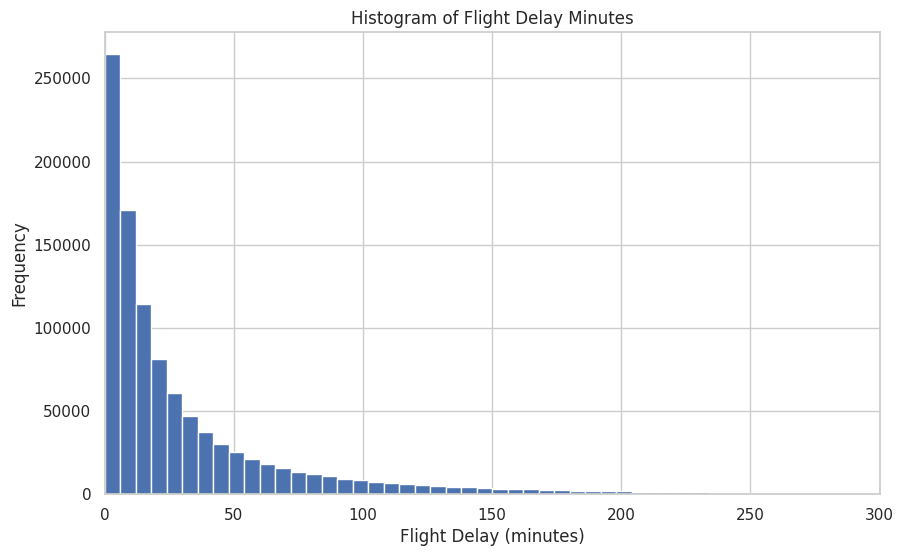

In [ ]:
# prompt: make histogram of flight delay minutes. x axis maximum of 300

plt.figure(figsize=(10, 6))
plt.hist(df['ARR_DELAY'], bins=50, range=(0, 300))  # Adjust bins as needed
plt.xlabel('Flight Delay (minutes)')
plt.ylabel('Frequency')
plt.title('Histogram of Flight Delay Minutes')
plt.xlim(0, 300)  # Set x-axis limit to 300
plt.show()

CODE TO CLEAN DATA AND ADD FEATURES!!!!!!!

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import os

# Load the cleaned dataset from the specified path in Google Drive
dataset_path = os.path.join(project_folder, 'datasets', 'cleaned_flight_data_with_features.csv')
df = pd.read_csv(dataset_path)

# Define target and feature sets
X = df.drop(columns=['ARR_DELAY'])  # Drop target variable from features
y = df['ARR_DELAY']  # Define target variable

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the path to save the split data in the 'datasets' folder
data_split_path = os.path.join(project_folder, 'datasets')
os.makedirs(data_split_path, exist_ok=True)

# Save the datasets to the 'datasets' folder in Google Drive
X_train.to_csv(os.path.join(data_split_path, 'X_train.csv'), index=False)
y_train.to_csv(os.path.join(data_split_path, 'y_train.csv'), index=False)
X_test.to_csv(os.path.join(data_split_path, 'X_test.csv'), index=False)
y_test.to_csv(os.path.join(data_split_path, 'y_test.csv'), index=False)

print(f"Data split into training and testing sets, and saved in '{data_split_path}' folder.")


FileNotFoundError: [Errno 2] No such file or directory: '/content/drive/My Drive/476 project/datasets/cleaned_flight_data_with_features.csv'

Baseline MSE: 983.42
Linear Regression MSE: 773.75


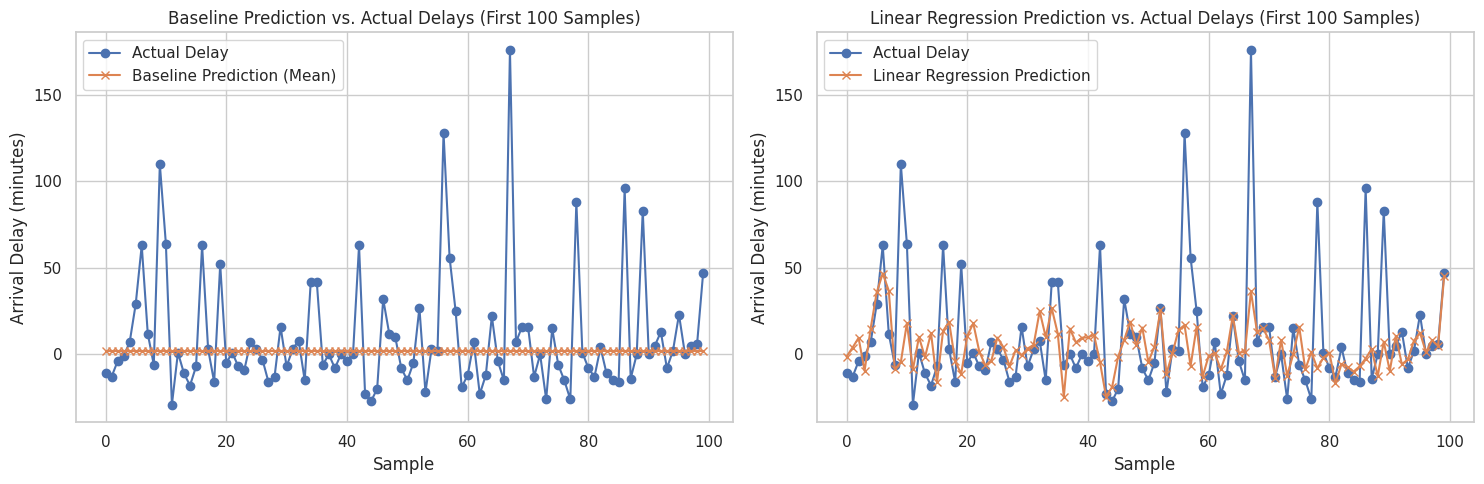

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.metrics import mean_squared_error
from sklearn.pipeline import Pipeline

# Load train and test datasets from the Google Drive path                                   #####How to do CV?
data_path = os.path.join(project_folder, 'datasets')
X_train = pd.read_csv(os.path.join(data_path, 'X_train.csv'))
y_train = pd.read_csv(os.path.join(data_path, 'y_train.csv')).squeeze()                     #####What is squeeze
X_test = pd.read_csv(os.path.join(data_path, 'X_test.csv'))
y_test = pd.read_csv(os.path.join(data_path, 'y_test.csv')).squeeze()

# Create a directory for model images in Google Drive
images_path = os.path.join(project_folder, 'model_images')                                  ######## Not Standardised prior to lin reg
os.makedirs(images_path, exist_ok=True)

# Define categorical and numerical features
categorical_features = ['AIRLINE', 'ORIGIN', 'DEST']
numerical_features = ['ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'MONTH', 'DEP_HOUR', 'DAY_OF_WEEK', 'MONTHLY_DELAY_INDICATOR', 'ROUTE_DELAY_INDICATOR']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(drop='first'), categorical_features)
    ]
)

# Baseline model (predicting mean delay)
baseline_pred = np.full_like(y_test, y_train.mean())
baseline_mse = mean_squared_error(y_test, baseline_pred)
print(f"Baseline MSE: {baseline_mse:.2f}")

# Plot baseline predictions vs actuals
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.plot(range(100), y_test[:100], label="Actual Delay", marker='o')
plt.plot(range(100), baseline_pred[:100], label="Baseline Prediction (Mean)", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Baseline Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()

plt.savefig(os.path.join(images_path, 'baseline_prediction_vs_actual.png'), bbox_inches='tight')

# Simple Linear Regression model with preprocessing
linear_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', LinearRegression())])                 ###What is pipeline?
linear_pipeline.fit(X_train, y_train)
linear_pred = linear_pipeline.predict(X_test)
linear_mse = mean_squared_error(y_test, linear_pred)
print(f"Linear Regression MSE: {linear_mse:.2f}")

# Plot linear model predictions vs actuals
plt.subplot(1, 2, 2)
plt.plot(range(100), y_test[:100], label="Actual Delay", marker='o')
plt.plot(range(100), linear_pred[:100], label="Linear Regression Prediction", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Linear Regression Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(images_path, 'linear_vs_baseline_prediction_comparison.png'), bbox_inches='tight')
plt.show()


Linear Regression MSE: 773.75


## Neural Network


In [ ]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.neural_network import MLPRegressor #this is the neural network part

# Special package to report regression summary statistics
!pip install -U dmba;
from dmba import regressionSummary

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 59.1 MB/s eta 0:00:00
Colab environment detected.


In [ ]:
# prompt: standardise numerical data

# Assuming X_train and X_test are your feature dataframes
# You'll need to identify the numerical features you want to standardize

numerical_features = ['ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'MONTH', 'DEP_HOUR', 'DAY_OF_WEEK', 'MONTHLY_DELAY_INDICATOR', 'ROUTE_DELAY_INDICATOR']


# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train[numerical_features] = scaler.fit_transform(X_train[numerical_features])
X_test[numerical_features] = scaler.transform(X_test[numerical_features])

In [ ]:
# prompt: create a linear regression using the now scaled data and output the MSE in terms of minutes

# Assuming X_train and X_test are your feature dataframes
# You'll need to identify the numerical features you want to standardize

numerical_features = ['ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'MONTH', 'DEP_HOUR', 'DAY_OF_WEEK', 'MONTHLY_DELAY_INDICATOR', 'ROUTE_DELAY_INDICATOR']

# Create a StandardScaler object
scaler = StandardScaler()

# Fit the scaler on the training data and transform both training and test data
X_train_scaled = scaler.fit_transform(X_train[numerical_features])
X_test_scaled = scaler.transform(X_test[numerical_features])

# Create and train the linear regression model
linear_regression = LinearRegression()
linear_regression.fit(X_train_scaled, y_train)

# Make predictions on the test data
y_pred = linear_regression.predict(X_test_scaled)

# Calculate the Mean Squared Error (MSE)
mse = mean_squared_error(y_test, y_pred)
print(f"Linear Regression MSE: {mse:.2f} minutes")

Linear Regression MSE: 823.32 minutes


In [ ]:
# prompt: convert categorical data to dummies and drop any strings leftover so that all is left is numerical

# Assuming 'X_train' and 'X_test' are your dataframes
# ... (your existing code) ...


# Define categorical and numerical features
categorical_features = ['AIRLINE', 'ORIGIN', 'DEST']
numerical_features = ['ELAPSED_TIME', 'AIR_TIME', 'DISTANCE', 'MONTH', 'DEP_HOUR', 'DAY_OF_WEEK', 'MONTHLY_DELAY_INDICATOR', 'ROUTE_DELAY_INDICATOR']

# Preprocessing pipeline
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_features) # handle_unknown='ignore' is important for unseen categories
    ]
)


# Fit and transform the training data
X_train_transformed = preprocessor.fit_transform(X_train)

# Transform the test data using the fitted preprocessor
X_test_transformed = preprocessor.transform(X_test)

# Convert the transformed data back to a dataframe (Optional, but useful for analysis)
# feature_names = (
#     numerical_features +
#     list(preprocessor.named_transformers_['cat'].get_feature_names_out(categorical_features))
# )
# X_train_df = pd.DataFrame(X_train_transformed, columns=feature_names)
# X_test_df = pd.DataFrame(X_test_transformed, columns=feature_names)

# Now X_train_transformed and X_test_transformed contain only numerical data
# You can use these to train and evaluate your models
# ... (your existing code) ...

In [ ]:
# prompt: create neural net and show a prograss bar for when exccecuted # Create neural net
# car_nnet = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)
# car_nnet.fit(X_train, y_train.ravel())

from tqdm import tqdm
import numpy as np

# Assuming X_train_transformed and y_train are your training data
# ... (your existing code) ...

# Create neural net
car_nnet = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1)

# Use tqdm to show a progress bar during the fitting process
with tqdm(total=100) as pbar:  # Adjust total based on the expected number of iterations
    car_nnet.fit(X_train_transformed, y_train.ravel())
    pbar.update(100)  # Update progress to 100% when fitting is complete

# ... (the rest of your code for model evaluation and prediction) ...

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-26-6e2752afba88>:16: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  car_nnet.fit(X_train_transformed, y_train.ravel())
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
100%|██████████| 100/100 [00:46<00:00,  2.17it/s]


Neural Network MSE: 767.87 minutes


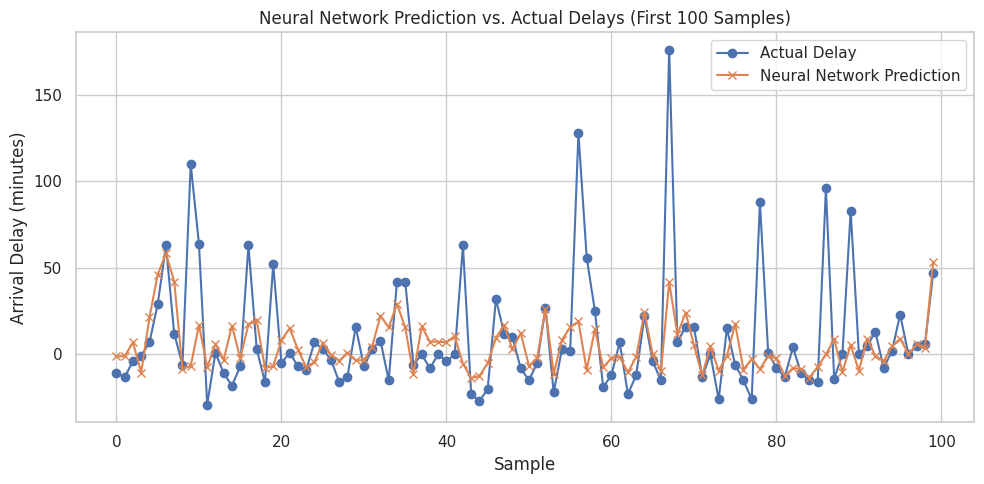

In [ ]:
# prompt: show MSE in minutes from the neural net and plot results

# Predict on the test set
y_pred_nnet = car_nnet.predict(X_test_transformed)

# Calculate the Mean Squared Error (MSE)
nnet_mse = mean_squared_error(y_test, y_pred_nnet)
print(f"Neural Network MSE: {nnet_mse:.2f} minutes")


# Plot neural network predictions vs actuals
plt.figure(figsize=(10, 5))
plt.plot(range(100), y_test[:100], label="Actual Delay", marker='o')
plt.plot(range(100), y_pred_nnet[:100], label="Neural Network Prediction", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Neural Network Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(images_path, 'neural_network_prediction_vs_actual.png'), bbox_inches='tight')
plt.show()

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-28-4443775c803b>:11: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  car_nnet_relu.fit(X_train_transformed, y_train.ravel())
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
100%|██████████| 100/100 [00:41<00:00,  2.42it/s]


Neural Network (ReLU) MSE: 769.63 minutes


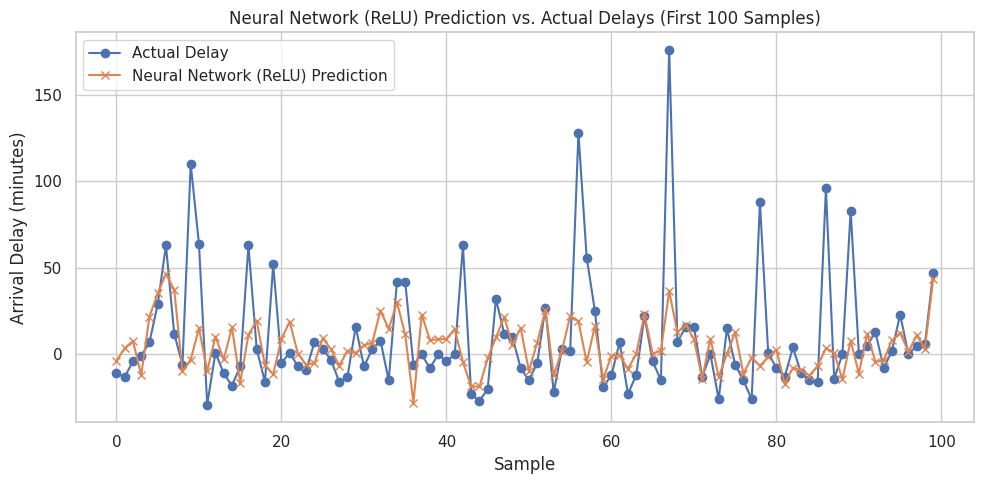

  0%|          | 0/100 [00:00<?, ?it/s]<ipython-input-28-4443775c803b>:41: FutureWarning: Series.ravel is deprecated. The underlying array is already 1D, so ravel is not necessary.  Use `to_numpy()` for conversion to a numpy array instead.
  car_nnet_tanh.fit(X_train_transformed, y_train.ravel())
/usr/local/lib/python3.10/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:545: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
100%|██████████| 100/100 [00:56<00:00,  1.78it/s]


Neural Network (Tanh) MSE: 770.47 minutes


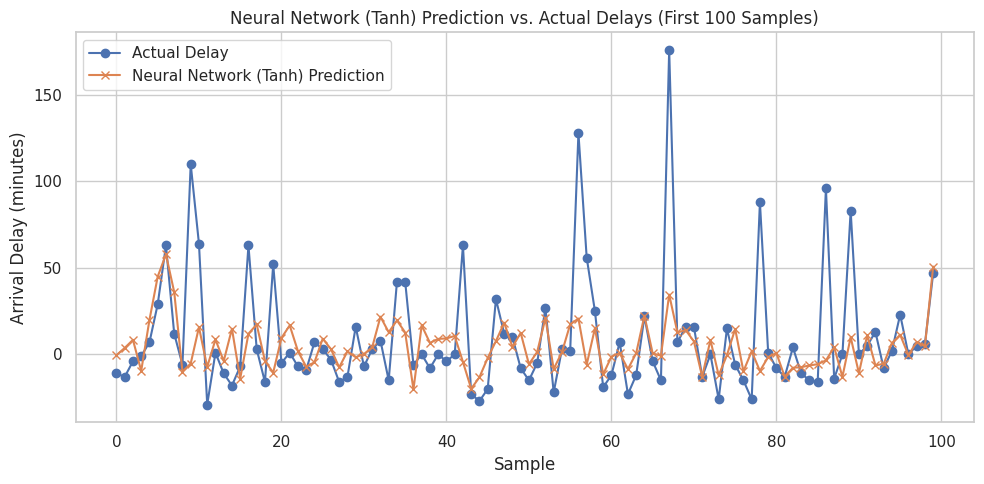

In [ ]:
# prompt: DO it all again but now with relu and then with tanh activation functions. display MSE and plots for both

# Assuming X_train_transformed and y_train are your training data
# ... (your existing code) ...

# Create neural net with ReLU activation
car_nnet_relu = MLPRegressor(hidden_layer_sizes=(2), activation='relu', solver='lbfgs', random_state=1)

# Use tqdm to show a progress bar during the fitting process
with tqdm(total=100) as pbar:
    car_nnet_relu.fit(X_train_transformed, y_train.ravel())
    pbar.update(100)

# Predict on the test set with ReLU
y_pred_nnet_relu = car_nnet_relu.predict(X_test_transformed)

# Calculate the Mean Squared Error (MSE) for ReLU
nnet_mse_relu = mean_squared_error(y_test, y_pred_nnet_relu)
print(f"Neural Network (ReLU) MSE: {nnet_mse_relu:.2f} minutes")


# Plot neural network (ReLU) predictions vs actuals
plt.figure(figsize=(10, 5))
plt.plot(range(100), y_test[:100], label="Actual Delay", marker='o')
plt.plot(range(100), y_pred_nnet_relu[:100], label="Neural Network (ReLU) Prediction", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Neural Network (ReLU) Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(images_path, 'neural_network_relu_prediction_vs_actual.png'), bbox_inches='tight')
plt.show()


# Create neural net with Tanh activation
car_nnet_tanh = MLPRegressor(hidden_layer_sizes=(2), activation='tanh', solver='lbfgs', random_state=1)

# Use tqdm to show a progress bar during the fitting process
with tqdm(total=100) as pbar:
    car_nnet_tanh.fit(X_train_transformed, y_train.ravel())
    pbar.update(100)


# Predict on the test set with Tanh
y_pred_nnet_tanh = car_nnet_tanh.predict(X_test_transformed)

# Calculate the Mean Squared Error (MSE) for Tanh
nnet_mse_tanh = mean_squared_error(y_test, y_pred_nnet_tanh)
print(f"Neural Network (Tanh) MSE: {nnet_mse_tanh:.2f} minutes")


# Plot neural network (Tanh) predictions vs actuals
plt.figure(figsize=(10, 5))
plt.plot(range(100), y_test[:100], label="Actual Delay", marker='o')
plt.plot(range(100), y_pred_nnet_tanh[:100], label="Neural Network (Tanh) Prediction", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Neural Network (Tanh) Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(images_path, 'neural_network_tanh_prediction_vs_actual.png'), bbox_inches='tight')
plt.show()

In [ ]:
# prompt: Now do it all again, this time only with logistic activation function and use L2 regularisation and use CV to output MSE in minutes and show plot

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Assuming X_train_transformed and y_train are your training data
# ... (your existing code) ...

# Create neural net with logistic activation and L2 regularization
car_nnet = MLPRegressor(hidden_layer_sizes=(2), activation='logistic', solver='lbfgs', random_state=1, alpha=0.001) # alpha is L2 regularization parameter

# Define cross-validation parameters
cv = KFold(n_splits=5, shuffle=True, random_state=1)

# Use cross_val_score to get MSE scores for each fold
mse_scores = cross_val_score(car_nnet, X_train_transformed, y_train.ravel(), cv=cv, scoring='neg_mean_squared_error')

# Calculate the average MSE across folds
average_mse = -np.mean(mse_scores)
print(f"Neural Network (Logistic with L2) Average MSE across CV: {average_mse:.2f} minutes")

# Train the model on the entire training data
with tqdm(total=100) as pbar:
    car_nnet.fit(X_train_transformed, y_train.ravel())
    pbar.update(100)

# Predict on the test set
y_pred_nnet = car_nnet.predict(X_test_transformed)

# Calculate the Mean Squared Error (MSE)
nnet_mse = mean_squared_error(y_test, y_pred_nnet)
print(f"Neural Network (Logistic with L2) MSE on Test Set: {nnet_mse:.2f} minutes")


# Plot neural network predictions vs actuals
plt.figure(figsize=(10, 5))
plt.plot(range(100), y_test[:100], label="Actual Delay", marker='o')
plt.plot(range(100), y_pred_nnet[:100], label="Neural Network (Logistic with L2) Prediction", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Neural Network (Logistic with L2) Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(images_path, 'neural_network_logistic_L2_prediction_vs_actual.png'), bbox_inches='tight')
plt.show()

NameError: name 'MLPRegressor' is not defined

## Decision Trees


Decision Tree (Full Tree) MSE: 1835.27


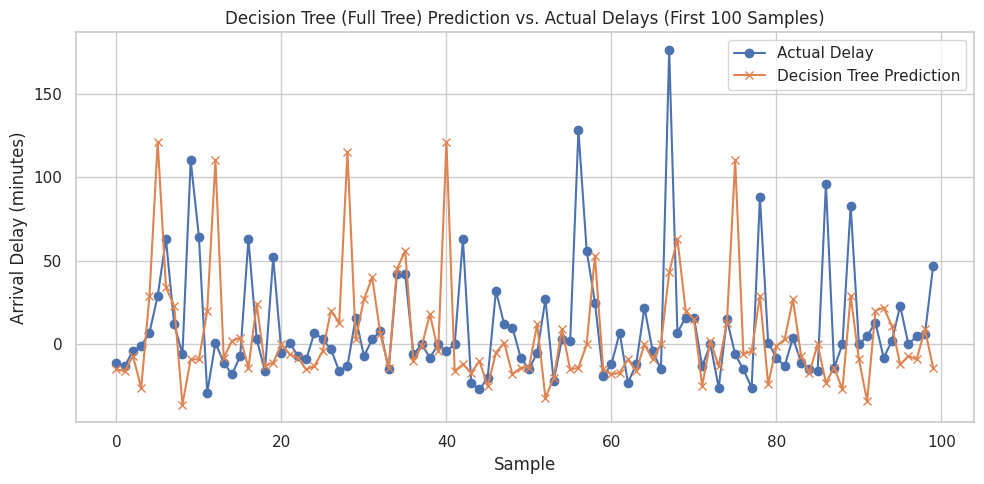

In [ ]:
# prompt: Now using decision trees, import relevant packages and create a full tree and output MSE and plot. only run the full tree on randomly chosen 5000 rows

from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

# Sample 5000 rows randomly from the training data
sampled_indices = np.random.choice(X_train_transformed.shape[0], size=5000, replace=False)
X_train_sample = X_train_transformed[sampled_indices]
y_train_sample = y_train.iloc[sampled_indices]

# Create and train a decision tree with no restrictions on depth
dt_regressor = DecisionTreeRegressor(random_state=42)
dt_regressor.fit(X_train_sample, y_train_sample)

# Make predictions on the test set
y_pred_dt = dt_regressor.predict(X_test_transformed)

# Calculate MSE
dt_mse = mean_squared_error(y_test, y_pred_dt)
print(f"Decision Tree (Full Tree) MSE: {dt_mse:.2f}")

# You can visualize the tree (but it might be very large)
# from sklearn.tree import plot_tree
# plt.figure(figsize=(20, 10))
# plot_tree(dt_regressor, feature_names=feature_names, filled=True)
# plt.show()

# Plot decision tree predictions vs actuals
plt.figure(figsize=(10, 5))
plt.plot(range(100), y_test[:100], label="Actual Delay", marker='o')
plt.plot(range(100), y_pred_dt[:100], label="Decision Tree Prediction", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Decision Tree (Full Tree) Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(images_path, 'decision_tree_full_prediction_vs_actual.png'), bbox_inches='tight')
plt.show()

Random Forest MSE: 915.41


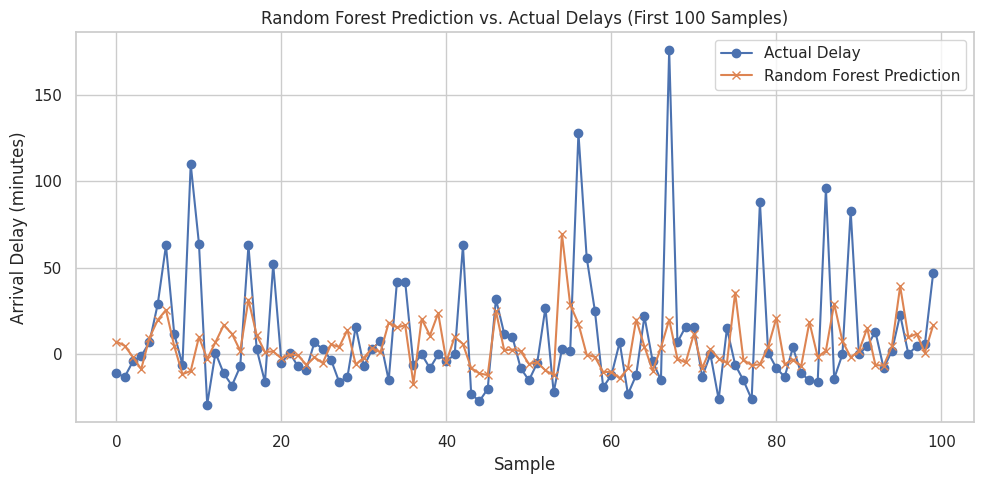

In [ ]:
# prompt: Do the same thing but with random forests on 5000 random rows

from sklearn.ensemble import RandomForestRegressor

# Sample 5000 rows randomly from the training data
sampled_indices = np.random.choice(X_train_transformed.shape[0], size=5000, replace=False)
X_train_sample = X_train_transformed[sampled_indices]
y_train_sample = y_train.iloc[sampled_indices]

# Create and train a random forest regressor
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
rf_regressor.fit(X_train_sample, y_train_sample)

# Make predictions on the test set
y_pred_rf = rf_regressor.predict(X_test_transformed)

# Calculate MSE
rf_mse = mean_squared_error(y_test, y_pred_rf)
print(f"Random Forest MSE: {rf_mse:.2f}")

# Plot random forest predictions vs actuals
plt.figure(figsize=(10, 5))
plt.plot(range(100), y_test[:100], label="Actual Delay", marker='o')
plt.plot(range(100), y_pred_rf[:100], label="Random Forest Prediction", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Random Forest Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(images_path, 'random_forest_prediction_vs_actual.png'), bbox_inches='tight')
plt.show()

AdaBoost MSE: 1403.58


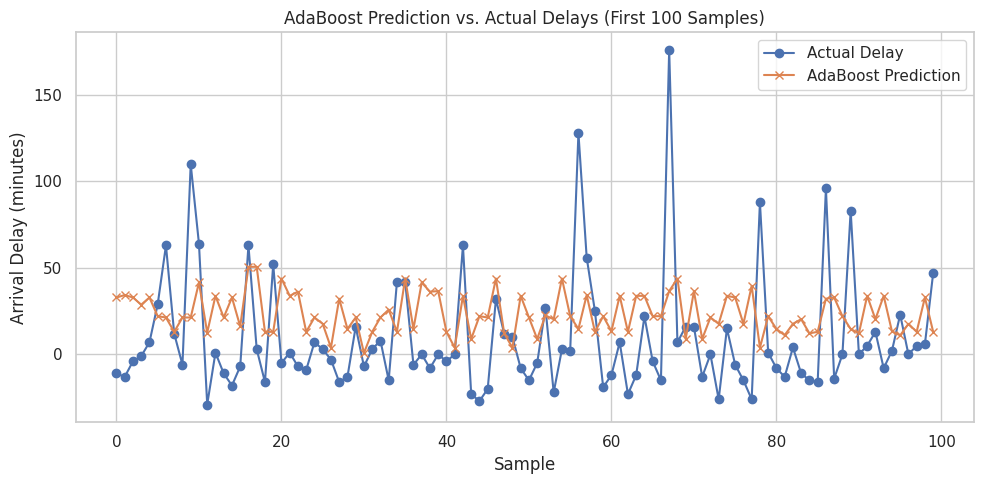

In [ ]:
# prompt: Now use boosting on the same 5000 rows

from sklearn.ensemble import AdaBoostRegressor

# Sample 5000 rows randomly from the training data
sampled_indices = np.random.choice(X_train_transformed.shape[0], size=5000, replace=False)
X_train_sample = X_train_transformed[sampled_indices]
y_train_sample = y_train.iloc[sampled_indices]

# Create and train an AdaBoost regressor with a decision tree as the base estimator
ada_regressor = AdaBoostRegressor(DecisionTreeRegressor(max_depth=3), n_estimators=100, random_state=42)
ada_regressor.fit(X_train_sample, y_train_sample)

# Make predictions on the test set
y_pred_ada = ada_regressor.predict(X_test_transformed)

# Calculate MSE
ada_mse = mean_squared_error(y_test, y_pred_ada)
print(f"AdaBoost MSE: {ada_mse:.2f}")

# Plot AdaBoost predictions vs actuals
plt.figure(figsize=(10, 5))
plt.plot(range(100), y_test[:100], label="Actual Delay", marker='o')
plt.plot(range(100), y_pred_ada[:100], label="AdaBoost Prediction", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("AdaBoost Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(images_path, 'adaboost_prediction_vs_actual.png'), bbox_inches='tight')
plt.show()

Lasso Regression MSE: 802.69
Ridge Regression MSE: 773.75


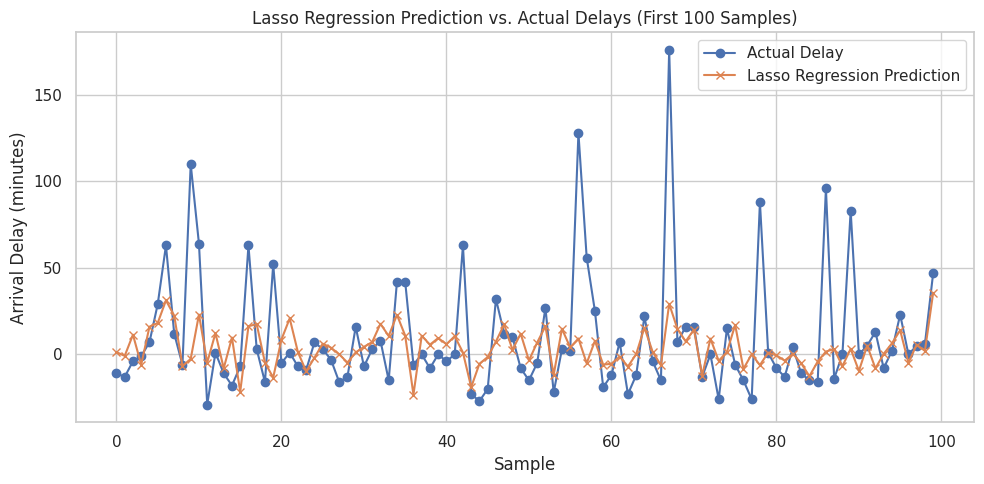

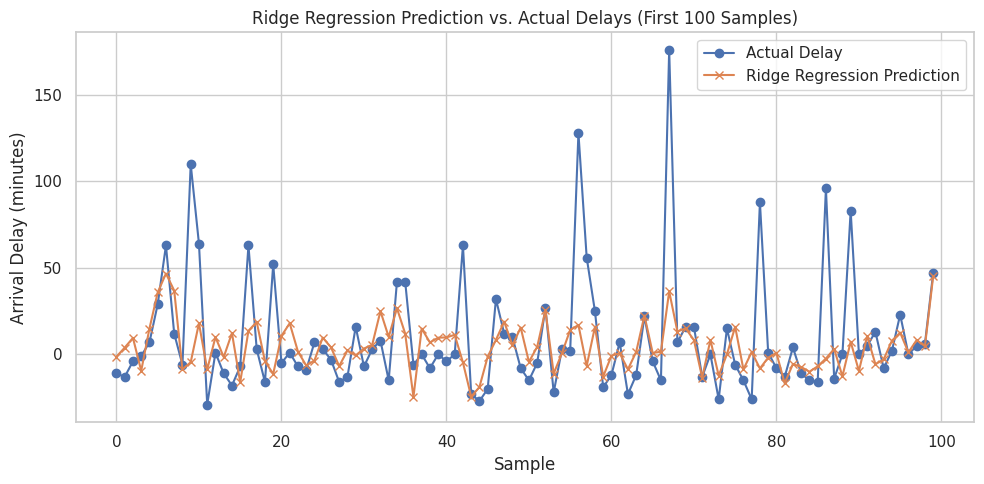

In [ ]:
# prompt: now do it with lasso and ridge

from sklearn.linear_model import Lasso, Ridge

# Lasso Regression
lasso_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Lasso(alpha=0.1))])  # Adjust alpha as needed
lasso_pipeline.fit(X_train, y_train)
lasso_pred = lasso_pipeline.predict(X_test)
lasso_mse = mean_squared_error(y_test, lasso_pred)
print(f"Lasso Regression MSE: {lasso_mse:.2f}")

# Ridge Regression
ridge_pipeline = Pipeline(steps=[('preprocessor', preprocessor), ('regressor', Ridge(alpha=0.1))])  # Adjust alpha as needed
ridge_pipeline.fit(X_train, y_train)
ridge_pred = ridge_pipeline.predict(X_test)
ridge_mse = mean_squared_error(y_test, ridge_pred)
print(f"Ridge Regression MSE: {ridge_mse:.2f}")


# Plot Lasso predictions vs actuals
plt.figure(figsize=(10, 5))
plt.plot(range(100), y_test[:100], label="Actual Delay", marker='o')
plt.plot(range(100), lasso_pred[:100], label="Lasso Regression Prediction", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Lasso Regression Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(images_path, 'lasso_prediction_vs_actual.png'), bbox_inches='tight')
plt.show()

# Plot Ridge predictions vs actuals
plt.figure(figsize=(10, 5))
plt.plot(range(100), y_test[:100], label="Actual Delay", marker='o')
plt.plot(range(100), ridge_pred[:100], label="Ridge Regression Prediction", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("Ridge Regression Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
df.head()

,AIRLINE,DAY_OF_WEEK,MONTH,DEST,ORIGIN,DEP_HOUR,DISTANCE,AIR_TIME,ELAPSED_TIME,MONTHLY_DELAY_INDICATOR,ROUTE_DELAY_INDICATOR,ARR_DELAY
0,United Air Lines Inc.,2,1,EWR,FLL,11,1065.0,153.0,176.0,-0.666226,-0.118908,-14.0
1,Delta Air Lines Inc.,5,11,SEA,MSP,21,1399.0,189.0,236.0,-0.810854,-0.736053,-5.0
2,United Air Lines Inc.,4,7,MSP,DEN,9,680.0,87.0,112.0,0.861305,-0.324053,0.0
3,Delta Air Lines Inc.,0,3,SFO,MSP,16,1589.0,249.0,285.0,-0.279781,-0.696272,24.0
4,American Airlines Inc.,6,6,BOS,DCA,10,399.0,58.0,89.0,1.000000,-0.455426,-29.0


KNN MSE: 953.14


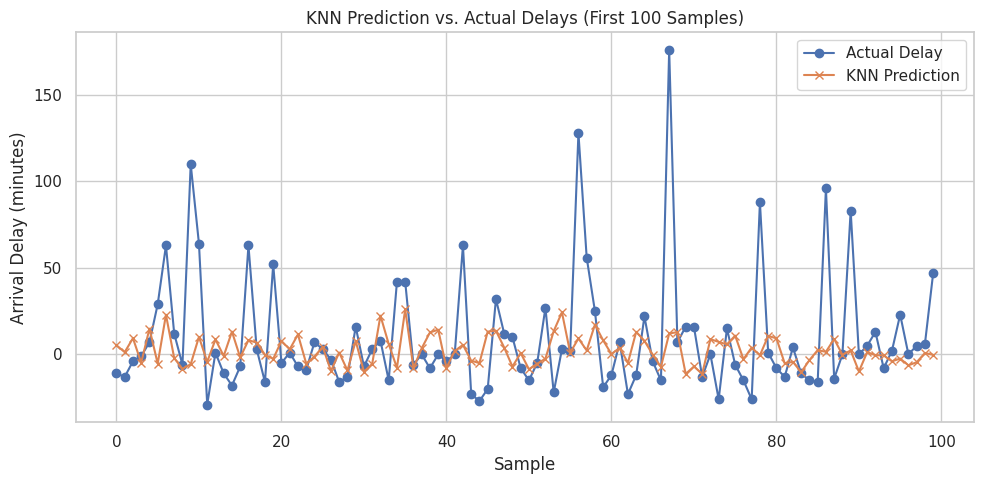

In [ ]:
# prompt: Now do it for KNN on 5000 random rows and plot and give MSE

from sklearn.neighbors import KNeighborsRegressor

# Sample 5000 rows randomly from the training data
sampled_indices = np.random.choice(X_train_transformed.shape[0], size=5000, replace=False)
X_train_sample = X_train_transformed[sampled_indices]
y_train_sample = y_train.iloc[sampled_indices]

# Create and train a KNN regressor
knn_regressor = KNeighborsRegressor(n_neighbors=25)  # You can adjust the number of neighbors
knn_regressor.fit(X_train_sample, y_train_sample)

# Make predictions on the test set
y_pred_knn = knn_regressor.predict(X_test_transformed)

# Calculate MSE
knn_mse = mean_squared_error(y_test, y_pred_knn)
print(f"KNN MSE: {knn_mse:.2f}")

# Plot KNN predictions vs actuals
plt.figure(figsize=(10, 5))
plt.plot(range(100), y_test[:100], label="Actual Delay", marker='o')
plt.plot(range(100), y_pred_knn[:100], label="KNN Prediction", marker='x')
plt.xlabel("Sample")
plt.ylabel("Arrival Delay (minutes)")
plt.title("KNN Prediction vs. Actual Delays (First 100 Samples)")
plt.legend()

plt.tight_layout()
plt.savefig(os.path.join(images_path, 'knn_prediction_vs_actual.png'), bbox_inches='tight')
plt.show()

In [ ]:
# prompt: find what percentage of the data is delayed less than 45 minutees

# Assuming 'y_test' and 'y_pred_rf' are your actual and predicted delays
# Calculate the percentage of data with delays less than 45 minutes

percentage_less_than_45 = ( (y_test <= 45).sum() / len(y_test) ) * 100

print(f"Percentage of data with delays less than 45 minutes: {percentage_less_than_45:.2f}%")

Percentage of data with delays less than 45 minutes: 91.87%


In [ ]:
# prompt: run cross validation for to select the best lambda (alpha) for lasso and for ridge and output the best mse and best lambda. do it only on 5000 random rows of the data

from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold

# Sample 5000 rows randomly from the training data
sampled_indices = np.random.choice(X_train_transformed.shape[0], size=5000, replace=False)
X_train_sample = X_train_transformed[sampled_indices]
y_train_sample = y_train.iloc[sampled_indices]


# Lasso Cross-Validation
lasso_alphas = np.logspace(-4, 2, 75)  # Define a range of lambda values to test
lasso_mse_scores = []
for alpha in lasso_alphas:
  lasso_model = Lasso(alpha=alpha)
  mse_scores = cross_val_score(lasso_model, X_train_sample, y_train_sample, cv=5, scoring='neg_mean_squared_error')
  lasso_mse_scores.append(-np.mean(mse_scores))

best_lasso_alpha = lasso_alphas[np.argmin(lasso_mse_scores)]
best_lasso_mse = np.min(lasso_mse_scores)

print(f"Best Lasso MSE: {best_lasso_mse:.2f}")
print(f"Best Lasso Lambda (alpha): {best_lasso_alpha:.4f}")


# Ridge Cross-Validation
ridge_alphas = np.logspace(-4, 2, 20)  # Define a range of lambda values to test
ridge_mse_scores = []
for alpha in ridge_alphas:
  ridge_model = Ridge(alpha=alpha)
  mse_scores = cross_val_score(ridge_model, X_train_sample, y_train_sample, cv=5, scoring='neg_mean_squared_error')
  ridge_mse_scores.append(-np.mean(mse_scores))

best_ridge_alpha = ridge_alphas[np.argmin(ridge_mse_scores)]
best_ridge_mse = np.min(ridge_mse_scores)

print(f"Best Ridge MSE: {best_ridge_mse:.2f}")
print(f"Best Ridge Lambda (alpha): {best_ridge_alpha:.4f}")

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 424552.8985322991, tolerance: 385.80287360000005
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 737349.4422433495, tolerance: 387.933541975
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 640515.7168390914, tolerance: 390.4697375
  model = cd_fast.sparse_enet_coordinate_descent(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_coordinate_descent.py:658: ConvergenceWarnin

Best Lasso MSE: 777.21
Best Lasso Lambda (alpha): 0.0155
Best Ridge MSE: 777.83
Best Ridge Lambda (alpha): 1.2743
